## Data Preparation
### The data source we used was the Wisconsin Breast Cancer result data. 


For classification, find the best from below ML algroithms:

* Gaussian Naive Bayes 
* Support Vector Machine (SVM) 
* K Nearest Neighbors (K-NN) 
* Decision Tree
* Random Forest
* Neural Network
* Gardiant Boosting


In [43]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://miro.medium.com/max/2400/0*B6MGGFnT-os8NQQV', width=1000, height=900)

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import models from scikit learn module:
from sklearn.model_selection import train_test_split  # to split the data into two parts
from sklearn import metrics  # for the check the error and accuracy of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, validation_curve # for tuning parameter


# load algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
url ='https://raw.githubusercontent.com/sara-kassani/Python-Machine-Learning-Codes/master/data/Breast%20Cancer%20Wisconsin.csv'
df= pd.read_csv(url,  index_col= None, na_values='?')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# remove column 'Unnamed'
df.drop('Unnamed: 32', axis=1 , inplace=True)
df.shape

(569, 32)

In [4]:
# remove column 'id'
df.drop('id', axis=1 , inplace=True)
df.shape

(569, 31)

In [5]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
print("There are 2 target classes:")
print( df["diagnosis"].unique().tolist())
print("---")
print("Target class distribution from a total of %d target values:" % len(df))
print(pd.Series(df["diagnosis"]).value_counts() )


There are 2 target classes:
['M', 'B']
---
Target class distribution from a total of 569 target values:
B    357
M    212
Name: diagnosis, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


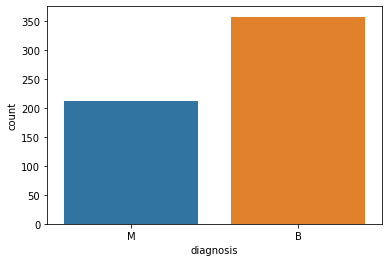

In [7]:
sns.countplot(df['diagnosis'],data = df)
plt.show()

In [8]:
def categorical_to_numeric_diagnosis(x):
    if x=='M':   # malignant
        return 1
    if x=='B':   # benign
        return 0

df['diagnosis']= df['diagnosis'].apply(categorical_to_numeric_diagnosis)

Text(0.5, 1.0, 'number of Benign_0 vs Malignan_1')

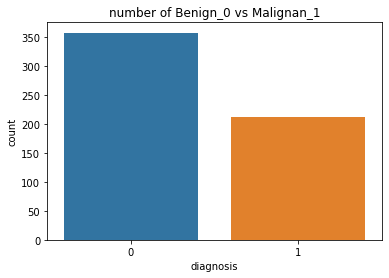

In [9]:
#visualizing diagnosis column >>> 'benign':0,'malignant':1
sns.countplot(x='diagnosis',data = df)
plt.title('number of Benign_0 vs Malignan_1') 

In [10]:
column_names=df.columns
column_names

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Exploring the Dataset

In [11]:
#get some information about our Data-Set
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# Check any Missing, NA, Data
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

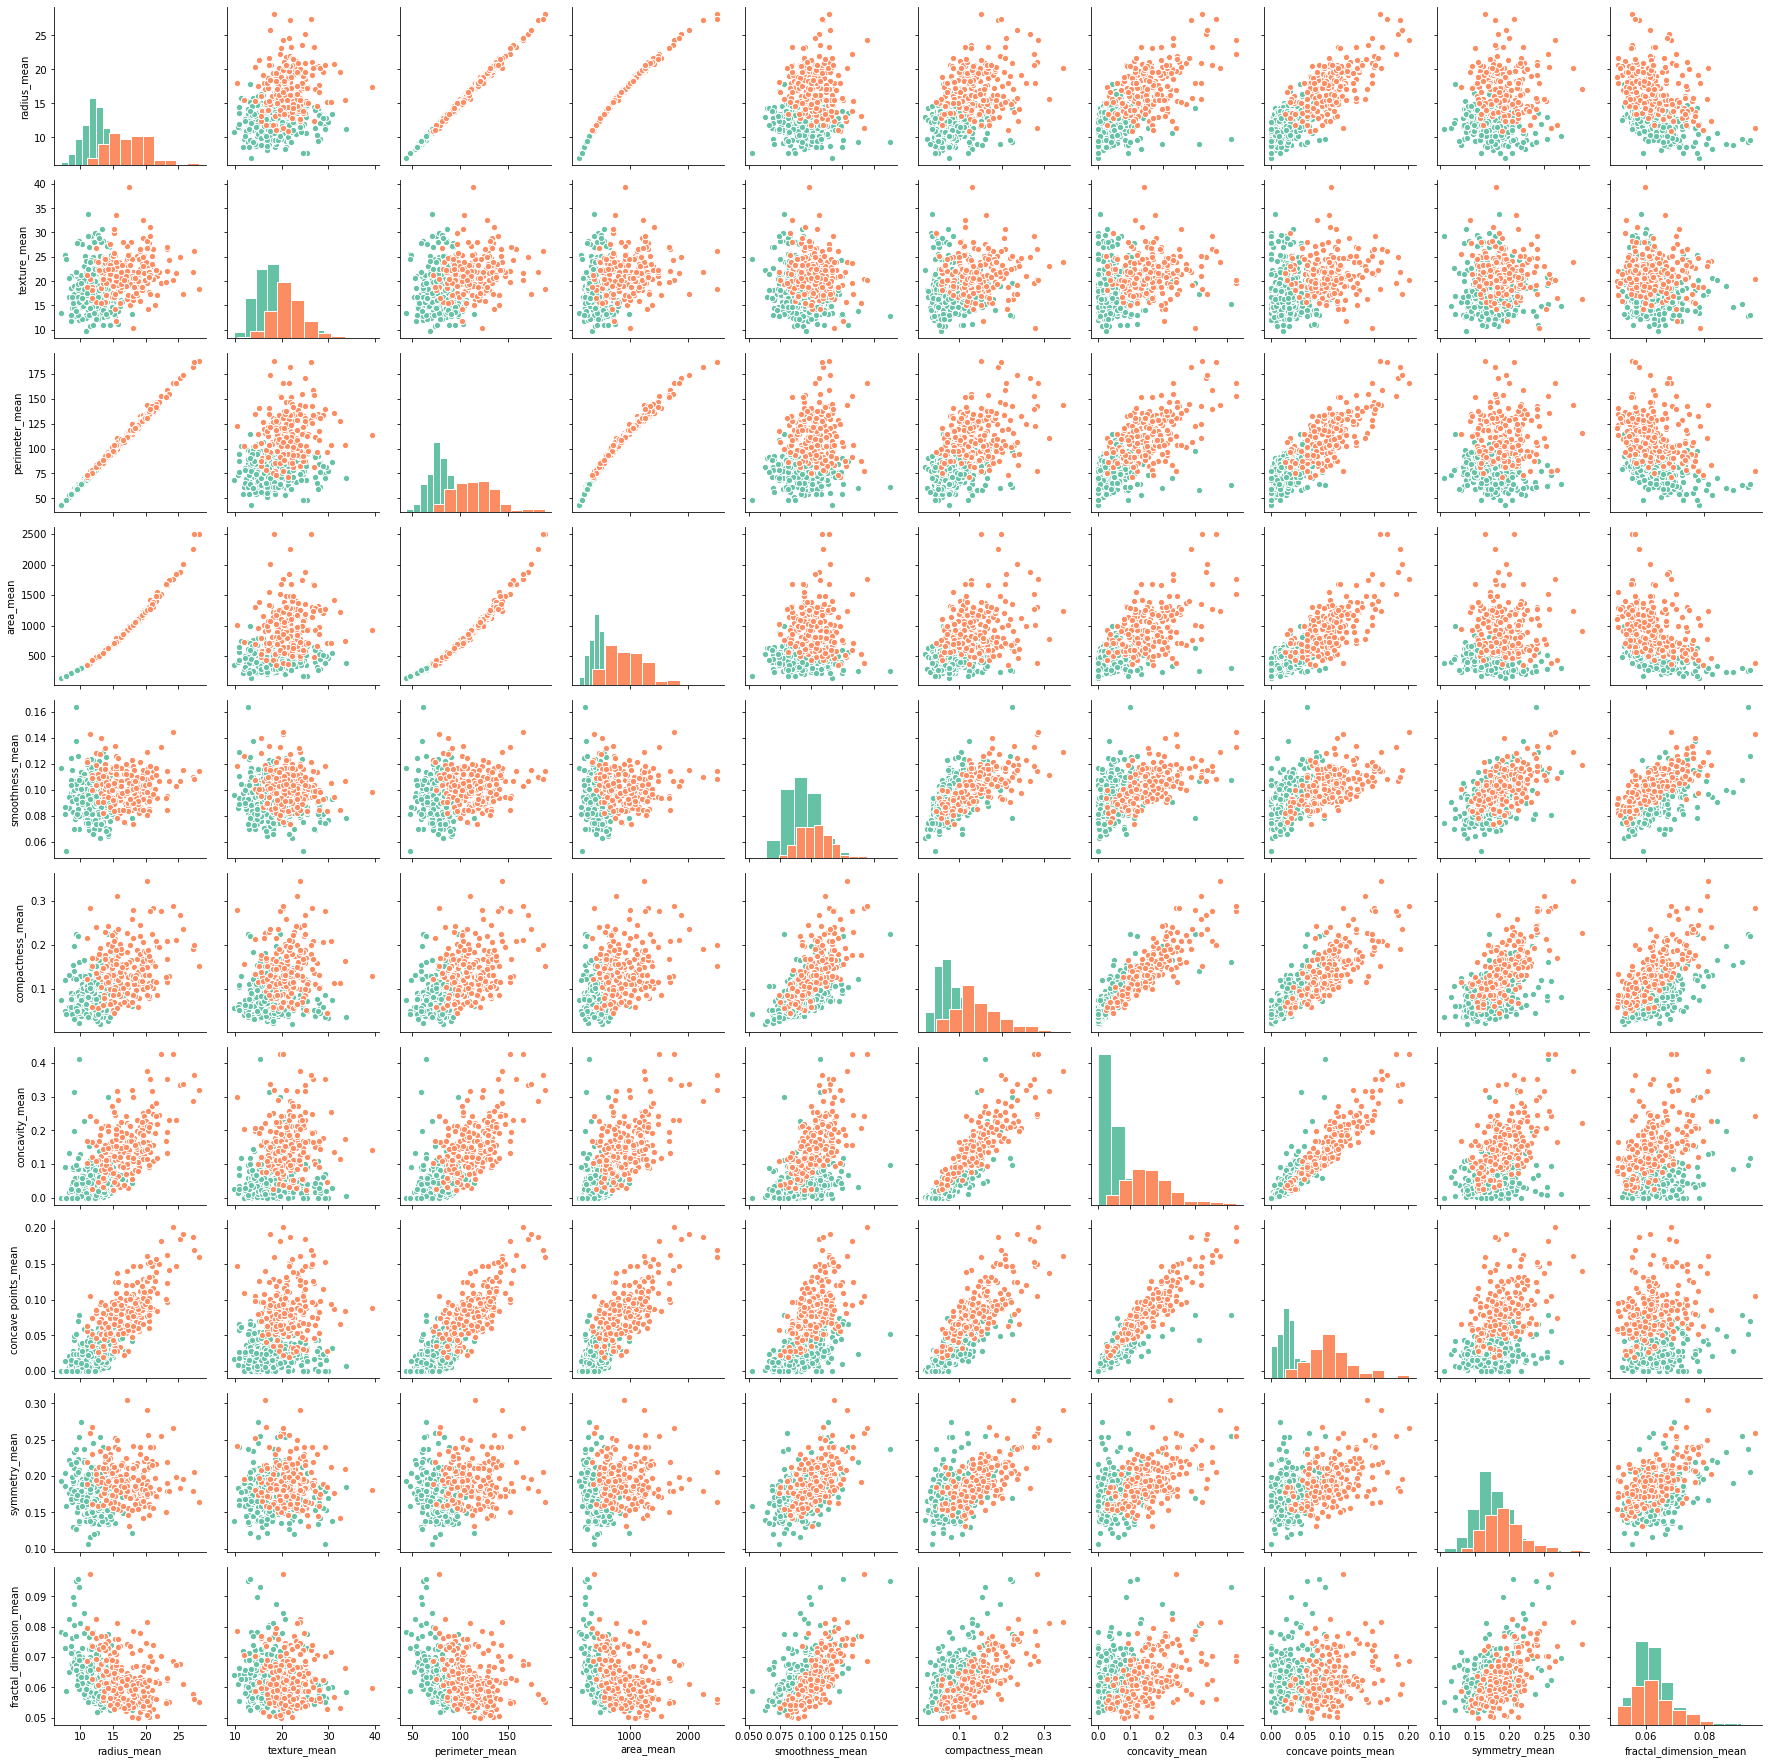

In [13]:
# Plot pairwise relationships to check the correlations between the mean features.

g = sns.PairGrid(df.iloc[:, 0:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.show()

It seems that:

   1. There are strong correlations between many variables. Next, a heatmap will be used to present the numerical correlations.

   2. The univariate distributions on the diagonal show a separation of malignant and benign cells for several mean features. Malignant cells tend to have larger mean values of:
       * radius
       * perimeter
       * area
       * compactness
       * concavity
       * concave points


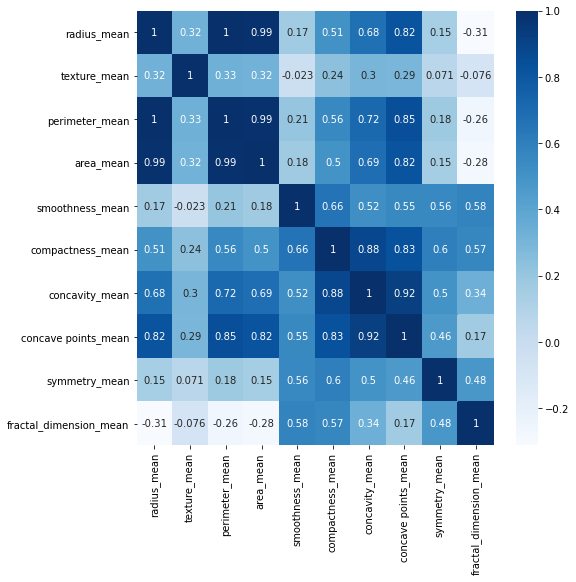

In [14]:
df_corr = df.iloc[:, 1:11].corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

* As it was expected there are very strong correlations between **radius, perimeter and area**.

* **Compactness, concavity and and concave points** are also highly correlated.

These highly correlated features result in redundant information. It is suggested to remove highly correlated features to avoid a predictive bias for the information contained in these features.

### Splitting the Data-Set into Training Set and Test Set

In [20]:
X = df.iloc[:,1:]  # feature
y = df['diagnosis'] # target

# in this our main data is splitted into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=100)
# we can check their dimension
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing

TLDR

    Use MinMaxScaler as your default
    Use RobustScaler if you have outliers and can handle a larger range
    Use StandardScaler if you need normalized features
    Use Normalizer sparingly - it normalizes rows, not columns



In [21]:
# to standardize the data:
# MinMaxScaler doesn't distort the distances between the values in each feature.
from sklearn.preprocessing import Normalizer, MinMaxScaler
 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


### Model selection

In [22]:
# Import the sklearn utility to compare algorithms
from sklearn import model_selection

In [23]:
# Prepare an array with all the algorithms
models = []

models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier())) # max_iterint, default=200

### Model Evaluation

In [24]:
names = []
scores = []

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split.sort_values(by=['Score'], inplace=True, ascending=False)
print(tr_split)                         

  Name     Score
6  MLP  0.973684
2  KNN  0.947368
4  RFC  0.947368
1  SVC  0.929825
5   GB  0.929825
0   NB  0.921053
3  DTC  0.903509


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### SVC and K Nearest Neighbors (K-NN); Random Forest and Neural Network have the same score of default settings

### K-Fold Cross Validation: 
With K-Fold cross validation as it is more accurate and use the data efficiently. We will train the models using 10 fold cross validation and calculate the mean accuracy of the models. “cross_val_score” provides its own training and accuracy calculation interface.

Use K fold cross validation to get the accuracy on the dataset. K fold cross validation is a method used to prevent overfitting (A situation where your model fits the training data too well but does not generalize well enough to data which is outside the training set).

In [25]:
import warnings;
warnings.filterwarnings('ignore');

names = []
scores = []

for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores })
kf_cross_val.sort_values(by=['Score'], inplace=True, ascending=False)
print(kf_cross_val)

  Name     Score
1  SVC  0.982415
2  KNN  0.977923
6  MLP  0.971256
4  RFC  0.969179
5   GB  0.962560
0   NB  0.945072
3  DTC  0.944879


#### SVC, K Nearest Neighbors (K-NN),  Random Forest are the highest 3 on K-Fold Cross Validation

### Evaluate Models on 10 k-folds:

NB: 0.945072 (0.022474)
SVC: 0.982415 (0.013110)
KNN: 0.977923 (0.014056)
DTC: 0.947053 (0.030331)
RFC: 0.962609 (0.028109)
GB: 0.962560 (0.028234)
MLP: 0.969130 (0.017781)


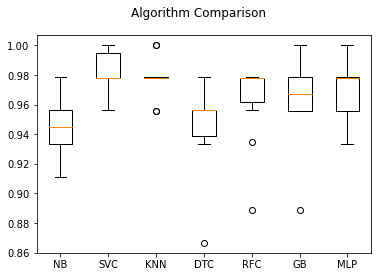

In [26]:
import warnings;
warnings.filterwarnings('ignore');

# evaluate each model in turn for 10 k-folds
# https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### SVC,  K Nearest Neighbors (K-NN) , and Random Forest are best 3 on 10 k-folds

### Hyperparameter tuning on best 4 models:

#### For SVC model before turning:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        65
           1       1.00      0.84      0.91        49

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



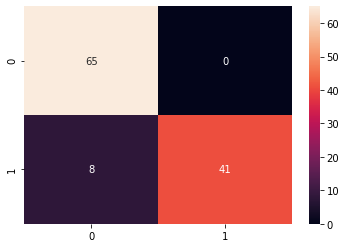

In [28]:
svc_model = SVC(probability=True)
svc_model.fit(X_train_scaled, y_train)
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

Parameters Optimization:

https://www.kaggle.com/sanikabhagat/breast-cancer-prediction-using-svm-and-grid-search
What does various paramters of the SVM Model mean? 

    C: C controls the cost of misclassification of training data. A large C value gives you low bias and high variance. Low bias because you penalize the cost of misclassification. With small C value, it gives you high bias and low variance

    gamma: It is related to the three parameters of rbf. The best default value of gamma is "auto". A large gamma value will lead to high bias and low variance in the model and vice versa

https://towardsdatascience.com/case-study-breast-cancer-classification-svm-2b67d668bbb7 
SVM parameters optimization

* C parameter — as we said, it controls the cost of misclassification on Train data.

    * Smaller C: Lower variance but higher bias (soft margin) and reduce the cost of miss-classification (less penalty).
    * Larger C: Lower bias and higher variance (hard margin) and increase the cost of miss-classification (more strict).
* Gamma: Smaller Gamma: Large variance, far reach, and more generalized solution. Larger Gamma: High variance and low bias, close reach, and also closer data points have a higher weight.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01, probability=True)
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        65
           1       1.00      0.88      0.93        49

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



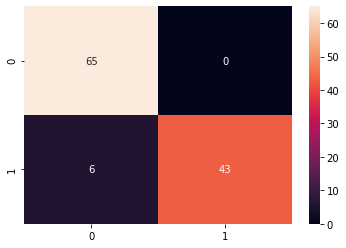

In [29]:
kfold = KFold(n_splits=10,random_state=10) 
param_grid = {'C':[0.1,1,10,100,1000],                        # default=1.0
              'gamma':[1,0.1,0.01,0.001,0.0001],              # default=’scale’
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}  # default=’rbf’

grid_svc = GridSearchCV(svc_model,param_grid,cv=kfold)
grid_svc.fit(X_train_scaled,y_train)
grid_predictions = grid_svc.predict(X_test_scaled)

# print best parameter after tuning 
print(grid_svc.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_svc.best_estimator_) 

cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))


What does the confusion matrix information result mean?:

    * We had 114 women in our test set
    * Out of 71 women predicted to not have breast cancer, 0 women were classified as not having when actually they had 
    (Type 1 error)
    * out of 43 women predicted to have breast cancer, 6 were classified as having breast cancer whey they did not 
    (Type 2 error)
What does this classification report result mean? 

Basically, it means that the SVM model was able to classify tumors into malignant/benign with 95% accuracy.

#### For KNN model before turning:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        65
           1       1.00      0.88      0.93        49

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



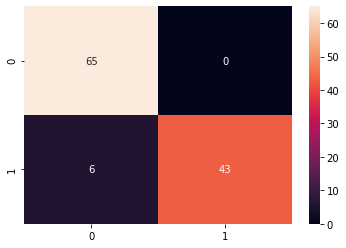

In [30]:
knn_model =  KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_predict_scaled = knn_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

Parameters Optimization:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7, 'weights': 'uniform'}
KNeighborsClassifier(leaf_size=1, n_neighbors=7)
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        65
           1       1.00      0.88      0.93        49

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



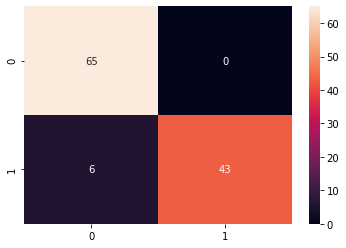

In [31]:
# https://www.kaggle.com/saramille/breast-cancer-prediction-knn-svc-and-logistic
# https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn

#Hyper Parameters Set
kfold = KFold(n_splits=10,random_state=10) 
param_grid = {'n_neighbors': list(range(1,50)),               # default=5
          'leaf_size':[1,2,3,5],                              # default=30
          'weights':['uniform', 'distance'],                  # default=’uniform’
          'algorithm':['auto', 'ball_tree','kd_tree','brute'] # default=’auto’
}
grid_knn = GridSearchCV(knn_model,param_grid,cv=kfold,n_jobs=-1) # njobs = -1, means that the number of jobs is set to the number of cores
grid_knn.fit(X_train_scaled,y_train)
grid_predictions = grid_knn.predict(X_test_scaled)

# print best parameter after tuning 
print(grid_knn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_knn.best_estimator_) 

cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))



#### For Nerual Network Model before turning:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        65
           1       1.00      0.92      0.96        49

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



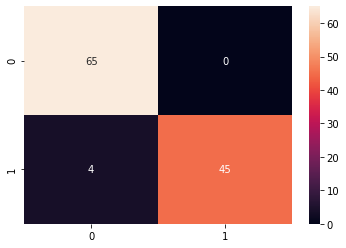

In [32]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train_scaled, y_train)
y_predict_scaled = mlp_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

Parameters Optimization:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 15, 'max_iter': 7000, 'solver': 'adam'}
MLPClassifier(alpha=0.001, hidden_layer_sizes=15, max_iter=7000)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       1.00      0.94      0.97        49

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



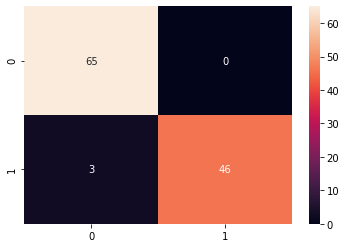

In [33]:
# https://www.kaggle.com/ptynecki/breast-cancer-prediction-with-mlp-99-5
#hyper parameters set

kfold = KFold(n_splits=10,random_state=10) 
param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'], # default=’relu’
        'solver': ['lbfgs', 'sgd', 'adam'],                           # default=’adam’
        'max_iter': range(1000, 10000, 1000),                         # default=200
        'alpha': [1e-4, 1e-3, 0.01, 0.1, 1],                          # default=0.0001
        #'random_state':[123],                                         # default=None      
        'hidden_layer_sizes':(15,)                                    # default=(100,)
}

grid_mlp = GridSearchCV(mlp_model,param_grid,cv=kfold,n_jobs=-1) 
grid_mlp.fit(X_train_scaled,y_train)
grid_predictions = grid_mlp.predict(X_test_scaled)

# print best parameter after tuning 
print(grid_mlp.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_mlp.best_estimator_) 

cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))



#### For Random Forest model before turning:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        65
           1       1.00      0.90      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



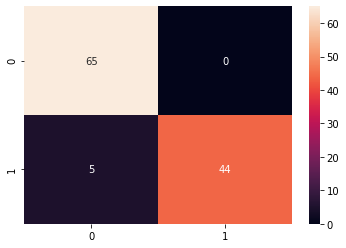

In [25]:
rfc_model =  RandomForestClassifier()
rfc_model.fit(X_train_scaled, y_train)
y_predict_scaled = rfc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

Parameters Optimization:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=50)
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        65
           1       1.00      0.90      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



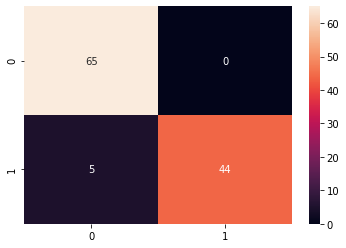

In [27]:
# https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn
# https://kavisekhon.com/Random%20Forest%20Classifier.html
#hyper parameters set
kfold = KFold(n_splits=10,random_state=10) 
param_grid = {'criterion':['gini','entropy'],             # default=”gini”
            'max_features': ['auto','log2', 'sqrt'],      # default=”auto”
            'n_estimators':np.arange(0,100, 25)[1:],      # default=100
            'min_samples_leaf':[1,2,3],                   # default=1
            'min_samples_split':[3,4,5,6,7],              # default=2
            #'max_depth':list(range(2,30,4)),            # default=None
            #'max_leaf_nodes':[5,10,25,50,75,100], # default=None
            #'random_state':[123],                        #default=None
            'bootstrap':  [True, False]                  # default=True
}


grid_rfc = GridSearchCV(rfc_model,param_grid,cv=kfold,n_jobs=-1) 
grid_rfc.fit(X_train_scaled,y_train)
grid_predictions = grid_rfc.predict(X_test_scaled)

# print best parameter after tuning 
print(grid_rfc.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_rfc.best_estimator_) 

cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

#### https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/
Interpreting the ROC curve

ROC curve

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

Note that the ROC does not depend on the class distribution. This makes it useful for evaluating classifiers predicting rare events such as diseases or disasters. In contrast, evaluating performance using accuracy (TP + TN)/(TP + TN + FN + FP) would favor classifiers that always predict a negative outcome for rare events.

model: KNN
thresholds: [2.  1.  0.6 0.2 0. ]
tpr:        [0.    0.714 0.878 0.959 1.   ]
fpr:        [0.    0.    0.    0.031 1.   ]
model: SVC
thresholds: [2.    1.    0.728 0.59  0.373 0.307 0.151 0.08  0.061 0.048 0.042 0.016
 0.015 0.   ]
tpr:        [0.    0.02  0.837 0.837 0.918 0.918 0.939 0.939 0.959 0.959 0.98  0.98
 1.    1.   ]
fpr:        [0.    0.    0.    0.015 0.015 0.046 0.046 0.108 0.108 0.154 0.154 0.2
 0.2   1.   ]
model: RFC
thresholds: [2.   1.   0.99 0.98 0.96 0.92 0.89 0.78 0.72 0.55 0.36 0.31 0.21 0.19
 0.14 0.13 0.12 0.09 0.06 0.05 0.04 0.03 0.02 0.01 0.  ]
tpr:        [0.    0.245 0.367 0.449 0.531 0.571 0.612 0.714 0.755 0.898 0.918 0.918
 0.918 0.918 0.959 0.959 0.98  0.98  0.98  0.98  0.98  1.    1.    1.
 1.   ]
fpr:        [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.015 0.031
 0.062 0.077 0.108 0.123 0.138 0.169 0.185 0.246 0.338 0.431 0.508 0.662
 1.   ]
model: MLP
thresholds: [2.    1.    0.457 0.325 0.289 0.258 0.257 0.222 0.179 0.  

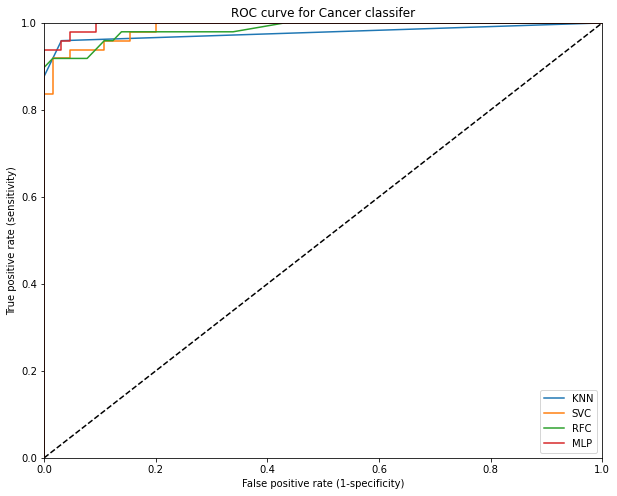

In [35]:
import warnings
warnings.filterwarnings('ignore')

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_knn_p =knn_model.predict_proba(X_test_scaled)[:,1]
y_pred_svc_p =svc_model.predict_proba(X_test_scaled)[:,1]
y_pred_rfc_p =rfc_model.predict_proba(X_test_scaled)[:,1]
y_pred_mlp_p =mlp_model.predict_proba(X_test_scaled)[:,1]

models=[y_pred_knn_p, y_pred_svc_p, y_pred_rfc_p, y_pred_mlp_p]
label=['KNN','SVC','RFC','MLP']

# plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot([0,1],[0,1],'k--')
m=np.arange(4)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    print('model:',label[m])
    print('thresholds:',np.round(thresholds,3))
    print('tpr:       ',np.round(tpr,3))
    print('fpr:       ',np.round(fpr,3))
    plt.plot(fpr,tpr,label=label[m])
plt.xlim([0.0,1])
plt.ylim([0.0,1])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)

### Feature Selection:¶

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

In [153]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://cdn.analyticsvidhya.com/wp-content/uploads/2018/08/Screenshot-from-2018-08-10-12-07-43.png', width=900, height=900)

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/


In [58]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png', width=900, height=900)

**Feature selection** is simply selecting and excluding given features without changing them.

**Dimensionality reduction**(feature extraction) transforms features into a lower dimension.

https://towardsdatascience.com/feature-selection-and-dimensionality-reduction-f488d1a035de
Feature Selection

    * Remove features with missing values
    * Remove features with low variance
    * Remove highly correlated features
    * Univariate feature selection
    * Recursive feature elimination
    * Feature selection using SelectFromModel

### Use Univariate method: SelectKBest to choose 10 features with the k highest scores


#### Score function:
#### For regression: f_regression, mutual_info_regression
#### For classification: chi2, f_classif, mutual_info_classif

https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

#### If the features are categorical, calculate a chi-square (χ2) statistic between each feature and the target vector.
#### However, if the features are quantitative, compute the ANOVA F-value between each feature and the target vector.
#### Mutual information is straightforward when considering the distribution of two discrete (categorical or ordinal) variables, such as categorical input and categorical output data. Nevertheless, it can be adapted for use with numerical input and categorical output.

Feature 0: 498.212529
Feature 1: 90.816895
Feature 2: 536.771146
Feature 3: 453.682834
Feature 4: 64.397854
Feature 5: 240.005214
Feature 6: 451.880281
Feature 7: 701.538736
Feature 8: 46.528567
Feature 9: 0.912709
Feature 10: 218.584004
Feature 11: 0.017950
Feature 12: 205.957649
Feature 13: 223.208530
Feature 14: 1.338850
Feature 15: 36.035916
Feature 16: 36.507073
Feature 17: 93.573958
Feature 18: 0.737928
Feature 19: 3.060480
Feature 20: 669.008904
Feature 21: 116.289767
Feature 22: 707.855522
Feature 23: 555.942070
Feature 24: 98.929841
Feature 25: 224.476213
Feature 26: 335.718642
Feature 27: 757.965077
Feature 28: 82.388802
Feature 29: 48.208053


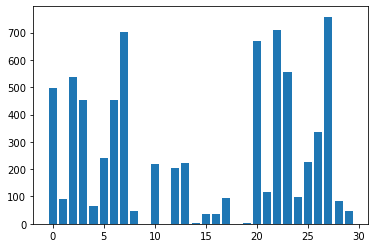

The ten selected features from F-Values are:
            Feature_Name       Score
27  concave points_worst  757.965077
22       perimeter_worst  707.855522
7    concave points_mean  701.538736
20          radius_worst  669.008904
23            area_worst  555.942070
2         perimeter_mean  536.771146
0            radius_mean  498.212529
3              area_mean  453.682834
6         concavity_mean  451.880281
26       concavity_worst  335.718642


In [112]:
# https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
# https://medium.com/@nmscott14/3-feature-selection-methods-e7ccd6dbf316
# https://medium.com/analytics-vidhya/feature-selection-methods-with-code-examples-a78439477cd4

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func= f_classif, k='all')   # Create an SelectKBest object to select features with two best ANOVA F-Values
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_scaled, y_train, X_test_scaled)

#what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Show results
# concatenate dataframes
df_scores = pd.DataFrame(fs.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print("The ten selected features from F-Values are:")
print(feature_scores.nlargest(10,'Score'))  # print 10 best features


### Feature Selection Using Random Forest

https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [138]:
from sklearn.feature_selection import SelectFromModel

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train_scaled, y_train)
## Print the name and gini importance of each feature
#for feature in zip(X.columns, clf.feature_importances_):
#    print(feature)

## summarize feature importance
#for i,v in enumerate( clf.feature_importances_):
#    print('Feature: %0d, Score: %.5f' % (i,v))

rfd = pd.DataFrame.from_records(zip(X.columns, clf.feature_importances_),columns =['Feature', 'Score'])
rfd.sort_values(by=['Score'], ascending=False)

,Feature,Score
27,concave points_worst,0.133625
22,perimeter_worst,0.121119
7,concave points_mean,0.117002
23,area_worst,0.105238
20,radius_worst,0.097983
2,perimeter_mean,0.048817
6,concavity_mean,0.045677
3,area_mean,0.045369
13,area_se,0.038877
0,radius_mean,0.037444


In [119]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit_transform(X_train_scaled, y_train)


In [126]:
# Print the names of the most important features
selected_feat= X.columns[(sel.get_support())]
selected_feat

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

#### Use feature selected data on hyperparameter tuning fro Random Forest Model

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 25}
RandomForestClassifier(bootstrap=False, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=25)
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        65
           1       1.00      0.88      0.93        49

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



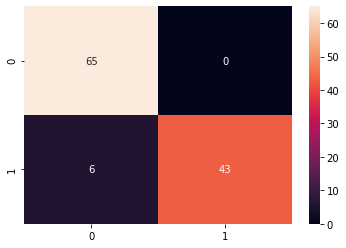

In [149]:
X_fs = X[ np.intersect1d(X.columns, selected_feat.tolist() )]  # feature
y = df['diagnosis'] # target
# in this our main data is splitted into train and test

X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_fs, y, test_size = 0.2, random_state=100)

scaler_fs = MinMaxScaler()
X_train_scaled_fs = scaler_fs.fit_transform(X_train_fs)
X_test_scaled_fs = scaler_fs.fit_transform(X_test_fs)


#hyper parameters set
kfold = KFold(n_splits=10,random_state=10) 
param_grid = {'criterion':['gini','entropy'],             # default=”gini”
            'max_features': ['auto','log2', 'sqrt'],      # default=”auto”
            'n_estimators':np.arange(0,100, 25)[1:],      # default=100
            'min_samples_leaf':[1,2,3],                   # default=1
            'min_samples_split':[3,4,5,6,7],              # default=2
            #'max_depth':list(range(2,30,4)),            # default=None
            #'max_leaf_nodes':[5,10,25,50,75,100], # default=None
            #'random_state':[123],                        #default=None
            'bootstrap':  [True, False]                  # default=True
}


grid_rfc = GridSearchCV(rfc_model,param_grid,cv=kfold,n_jobs=-1) 
grid_rfc.fit(X_train_scaled_fs,y_train)
grid_predictions = grid_rfc.predict(X_test_scaled_fs)

# print best parameter after tuning 
print(grid_rfc.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_rfc.best_estimator_) 

cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

#### Use above hyperparameters on Random Forest Model with features selected

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        65
           1       1.00      0.90      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



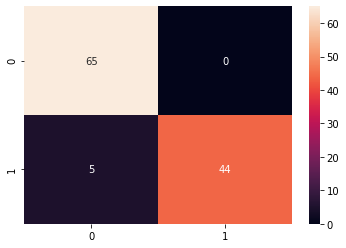

In [152]:
rfc_model =  RandomForestClassifier(bootstrap= False, criterion= 'gini', max_features= 'auto', min_samples_leaf= 3, min_samples_split= 7, n_estimators= 25)
rfc_model.fit(X_train_scaled_fs, y_train)
y_predict_scaled = rfc_model.predict(X_test_scaled_fs)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))